In [14]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats,lngs)
lat_lngs  


In [16]:
# Use the Citipy module to determine city based on latitude and longitude
from citipy import citipy

In [17]:
# initiate empty list
cities = []

# for loop
for x in lat_lngs:
    #do this
    city= citipy.nearest_city(x[0], x[1]).city_name

    if city not in cities:
        cities.append(city)

# return statement
len(cities)

795

In [18]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [19]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_weather_description = city_weather["weather"][0]["description"]

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Current Description": city_weather_description})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | torbay
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | pangnirtung
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | quatre cocos
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | vila franca do campo
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | chicama
Processing Record 11 of Set 1 | broome
Processing Record 12 of Set 1 | omealca
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | lake city
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | udachnyy
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | madona
Processing Record 22 of Set 1 | airai
Proc

In [22]:
city_data=pd.DataFrame(city_data)

In [23]:
print(city_data.shape)
city_data.head()

(738, 9)


,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Torbay,CA,47.6666,-52.7314,51.89,86,70,4.61,broken clouds
1,Pangnirtung,CA,66.1451,-65.7125,25.83,88,100,4.76,overcast clouds
2,Mataura,NZ,-46.1927,168.8643,53.47,61,89,4.41,overcast clouds
3,Quatre Cocos,MU,-20.2078,57.7625,71.71,58,74,20.18,broken clouds
4,Hithadhoo,MV,-0.6000,73.0833,83.19,69,8,8.68,clear sky


In [24]:
outputdatafile = "WeatherPy_Database.csv"
city_data.to_csv(outputdatafile,index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data["Lat"]
max_temps = city_data["Max Temp"]
humidity = city_data["Humidity"]
cloudiness = city_data["Cloudiness"]
wind_speed = city_data["Wind Speed"]

In [27]:
# Import the time module.
import time


1653881450.9181697

In [29]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/29/22'

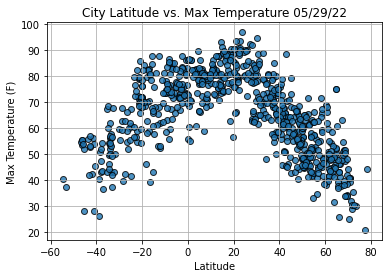

In [31]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

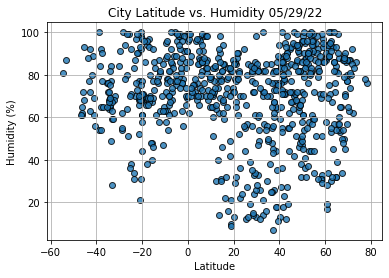

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

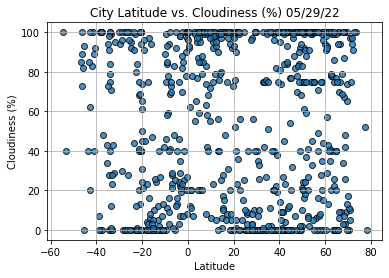

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

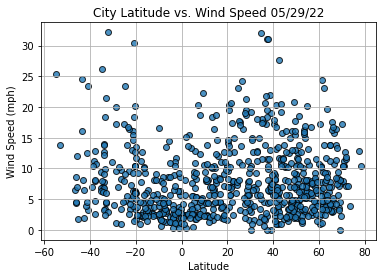

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
index13 = city_data.loc[13]
index13

City                      Butaritari
Country                           KI
Lat                           3.0707
Lng                         172.7902
Max Temp                       82.22
Humidity                          72
Cloudiness                        55
Wind Speed                     15.46
Current Description    broken clouds
Name: 13, dtype: object

In [39]:
city_data["Lat"] >=0

0       True
1       True
2      False
3      False
4      False
       ...  
733     True
734    False
735     True
736    False
737    False
Name: Lat, Length: 738, dtype: bool

In [40]:
city_data.loc[(city_data["Lat"] >= 0)]


,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Torbay,CA,47.6666,-52.7314,51.89,86,70,4.61,broken clouds
1,Pangnirtung,CA,66.1451,-65.7125,25.83,88,100,4.76,overcast clouds
6,Vila Franca Do Campo,PT,37.7167,-25.4333,57.61,82,99,9.98,light rain
9,Broome,US,42.2506,-75.8330,65.66,72,4,1.01,clear sky
10,Omealca,MX,18.7500,-96.7667,76.96,82,100,2.33,overcast clouds
...,...,...,...,...,...,...,...,...,...
730,Hudson Bay,CA,52.8500,-102.3842,50.41,99,100,1.43,overcast clouds
731,Surigao,PH,9.7839,125.4889,79.32,79,100,2.33,very heavy rain
732,Peniche,PT,39.3558,-9.3811,63.28,89,100,9.01,overcast clouds
733,Tessalit,ML,20.1986,1.0114,90.34,13,93,6.98,overcast clouds


In [41]:
city_data.loc[(city_data["Lat"] >= 0)].head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Torbay,CA,47.6666,-52.7314,51.89,86,70,4.61,broken clouds
1,Pangnirtung,CA,66.1451,-65.7125,25.83,88,100,4.76,overcast clouds
6,Vila Franca Do Campo,PT,37.7167,-25.4333,57.61,82,99,9.98,light rain
9,Broome,US,42.2506,-75.8330,65.66,72,4,1.01,clear sky
10,Omealca,MX,18.7500,-96.7667,76.96,82,100,2.33,overcast clouds


In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data.loc[(city_data["Lat"] >= 0)]
southern_hemi_df = city_data.loc[(city_data["Lat"] < 0)]

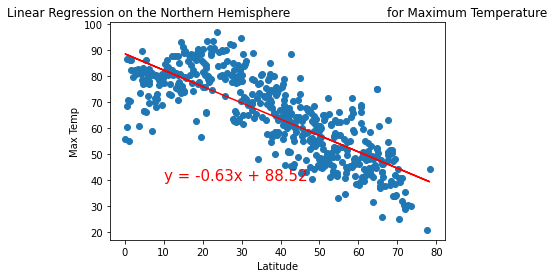

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

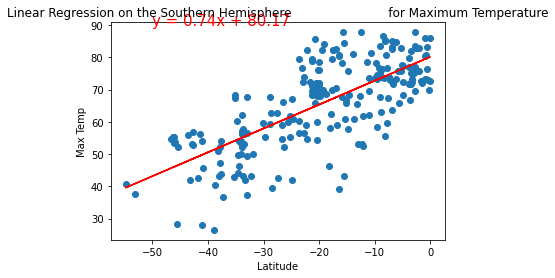

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

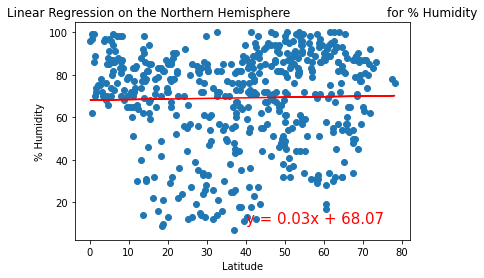

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

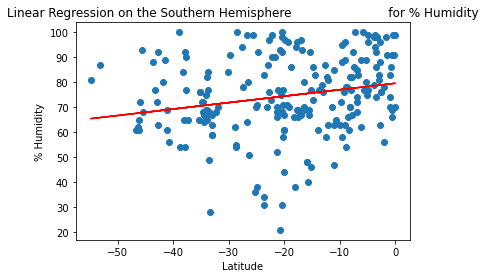

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

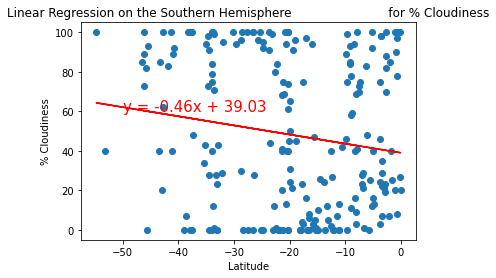

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

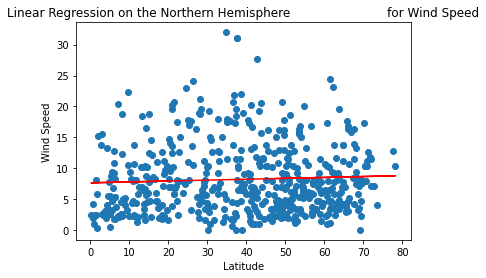

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

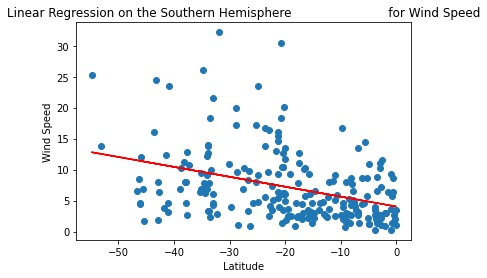

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [52]:
pip install gmaps

Note: you may need to restart the kernel to use updated packages.


SyntaxError: invalid syntax (2509439392.py, line 1)